## Business problem Understanding

Dream housing finace company deals in all kinds of home loans..They have presence across all urban and rural areas.Customer first applies for home loan and after that company validate the customer eligibility for loan.

Costomer wants to automate the loan eligibility process(real time) based on customer detail provide while filing online appplication form. These details are Gender,marital, Status,Education,Number of Dependents,income,Loan Amount,Credit,History and others.to automate this process,they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specififically target these customers.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data understanding

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
data['Loan_ID'].nunique


<bound method IndexOpsMixin.nunique of 0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object>

## Drop unimportant columns as per features selection(filter methods)

In [16]:
data.drop(columns =['Loan_ID'],inplace=True)

In [17]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [18]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [19]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [21]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [157]:
data['Dependents'].value_counts()

Dependents
0    307
2     92
1     85
3     45
Name: count, dtype: int64

In [23]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [24]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [25]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [159]:
data['Self_Employed'].value_counts()

Self_Employed
0    459
1     70
Name: count, dtype: int64

**Create New Columns as per requirements**

In [27]:
data['Income']=data['ApplicantIncome'] + data['CoapplicantIncome']

data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace = True)

In [28]:
data["Income"].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [29]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [30]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [31]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [32]:
data['Credit_History'] = data['Credit_History'].replace({1:"good",0:"bad"})

In [33]:
data['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [34]:
data['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [35]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [36]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [37]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [38]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [39]:
continous = ['Income','LoanAmount']
discrete_categorical = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

discrete_count = ['Dependets','Loan_Amount_Term']

Exploratory Data Analysis(EDA)

for continous variable

In [40]:
data[continous].describe()


,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


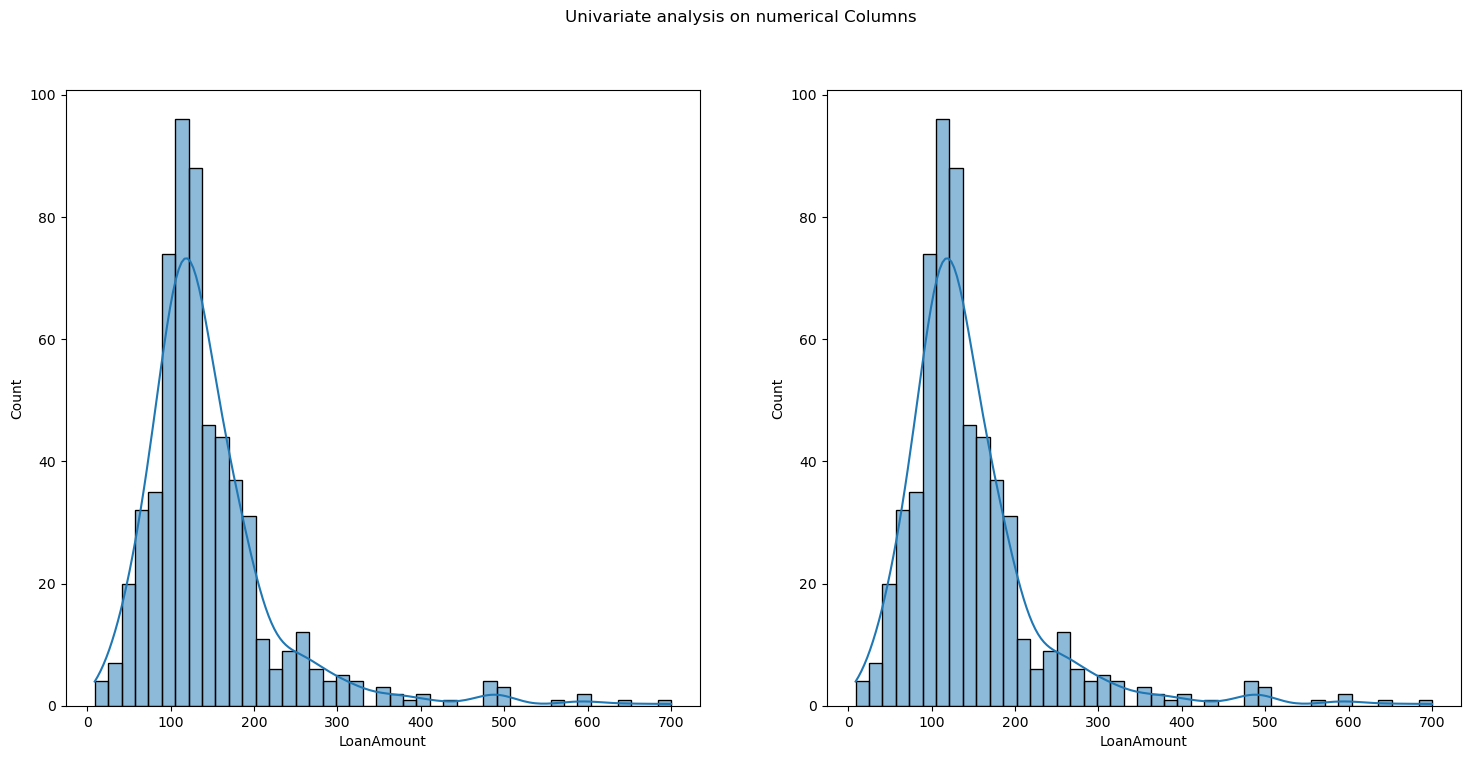

In [41]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.histplot(data['LoanAmount'],kde=True)

plt.subplot(1,2,2)
sns.histplot(data['LoanAmount'],kde=True)

plt.suptitle('Univariate analysis on numerical Columns')
plt.show()

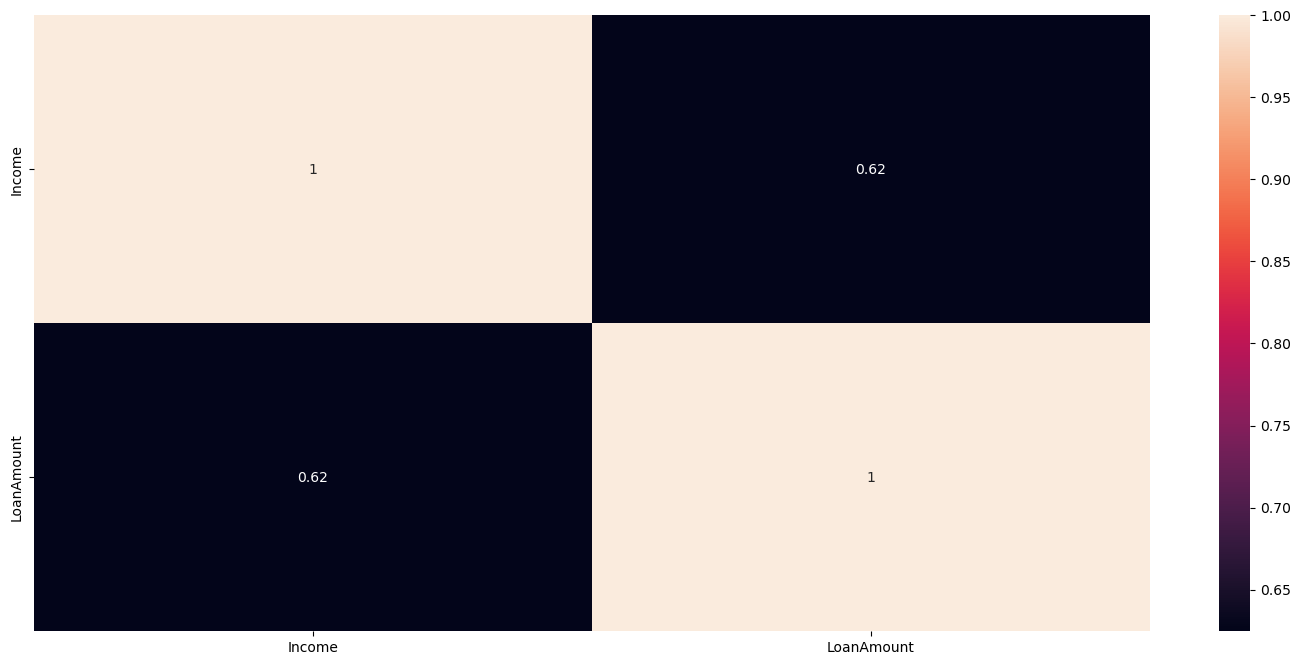

In [42]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

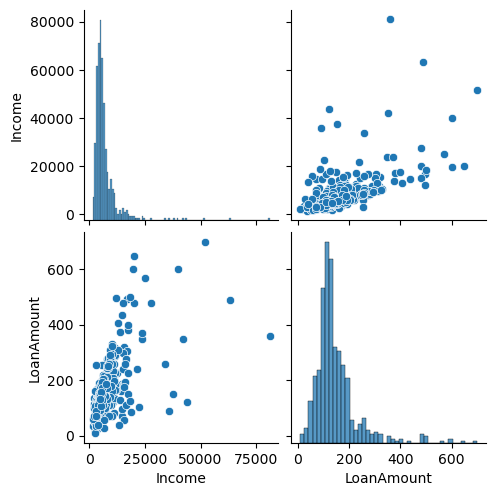

In [43]:
sns.pairplot(data[continous])
plt.show()

for Discrete variable

In [44]:
data[discrete_categorical].describe()


,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


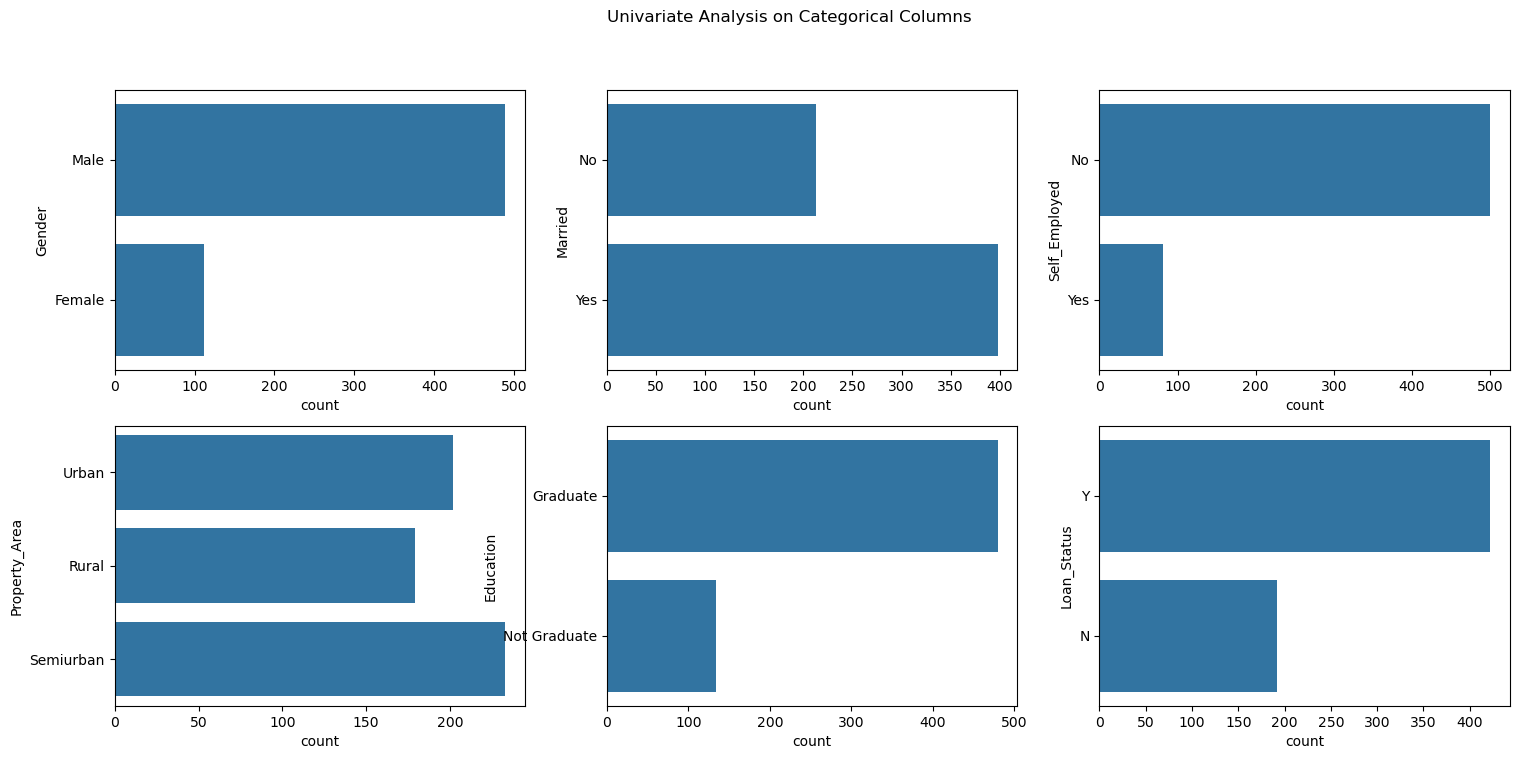

In [45]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2,3,1)
sns.countplot(data['Gender'])

plt.subplot(2,3,2)
sns.countplot(data['Married'])

plt.subplot(2,3,3)
sns.countplot(data['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(data['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(data['Education'])

plt.subplot(2,3,6)
sns.countplot(data['Loan_Status'])

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()

In [46]:
# lets campare all the categories with respect to the loan status to understand the overall important

print("Impact of marrige on Loan Status")
print(pd.crosstab(data['Loan_Status'],data['Married']))
print("\n")

print("Impact of Dependencies on Loan Status")
print(pd.crosstab(data['Loan_Status'],data['Dependents']))
print("\n")

print("Impact of Education on Loan Status")
print(pd.crosstab(data['Loan_Status'],data['Education']))
print("\n")

print("Impact of Employment on Loan Status")
print(pd.crosstab(data['Loan_Status'],data['Self_Employed']))
print("\n")

print("Impact of Property on Loan Status")
print(pd.crosstab(data['Loan_Status'],data['Property_Area']))
print("\n")

print("Impact of Property on Loan Status")
print(pd.crosstab(data['Loan_Status'],data['Credit_History']))
print("\n")

Impact of marrige on Loan Status
Married       No  Yes
Loan_Status          
N             79  113
Y            134  285


Impact of Dependencies on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   26
Y              343   56


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 69         54     69
Y                110        179    133


Impact of Property on Loan Status
Credit_History  bad  good
Loan_Status              
N                82    97
Y                 7   378




### check for Missing Value

In [47]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

### check for skewness

In [48]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

### check outliers

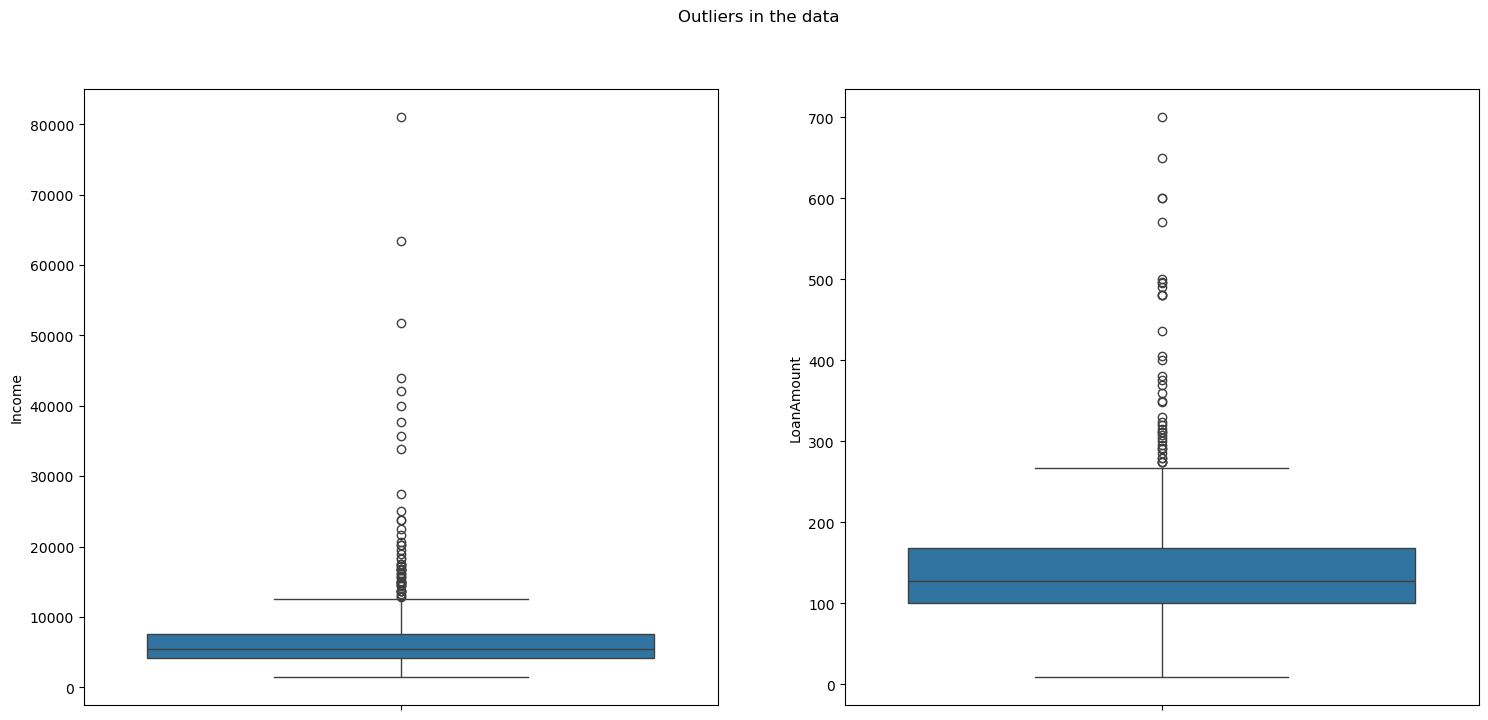

In [49]:
# lets visualised the outliers using box plot

plt.subplot(1,2,1)
sns.boxplot(data["Income"])

plt.subplot(1,2,2)
sns.boxplot(data["LoanAmount"])

plt.suptitle("Outliers in the data")
plt.show()

# Stage-3. Data Preparation

1. Data Cleaning
   - Wrong Data
   - missing values
   - wrong data type
   - duplicates
   - outliers

2. Data Wrangling
   - transformation
   - scaling(applicable on continous)
   - encoding(applicable on discrete categorival)
   - **dont apply any data wrangling technique on count variable**

### Wrong Data Treatment

In [50]:
data['Dependents'] = data['Dependents'].replace({'3+':3})

In [51]:
data['Dependents'].unique()

array(['0', '1', '2', 3, nan], dtype=object)

Missing values Treatmentm

In [52]:
# data['Dependents'] = data['Dependents'].fillna(0)

# data['Gender'] = data["Gender"].fillna(data['Gender'].mode()[0])
# data['Married'] = data["Married"].fillna(data['Married'].mode()[0])
# data['Self_Employed'] = data["Self_Employed"].fillna(data['Self_Employed'].mode()[0])

# data = data.dropna(subset=["Income",'LoanAmount','Loan_Amount_Term','Credit_History'])
# ''''''

In [53]:
# 1. Fill Dependents with '0'
data['Dependents'] = data['Dependents'].fillna('0')

# 2. Fill categorical columns with mode (if mode exists)
for col in ['Gender', 'Married', 'Self_Employed']:
    if not data[col].mode().empty:
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna('Unknown')

# 3. Drop rows with missing values in critical numerical columns
data = data.dropna(subset=['Income', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])


In [54]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

In [55]:
if 'Dependdents' in data.columns:
    data.drop(columns='Dependdents', inplace=True)


In [56]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

### Data Type conversions 

In [57]:
data['Dependents']=data['Dependents'].astype('int')
data['Loan_Amount_term'] = data['Loan_Amount_Term'].astype('int')

In [58]:
data.duplicated().sum()

0

In [59]:
duplicates = data[data.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status, Income, Loan_Amount_term]
Index: []


In [60]:
data = data.drop_duplicates()


In [61]:
data.duplicated().sum()

0

**Outliers should be ratrained(beacause really some people will have high income)**

**Encoding**

In [74]:
data['Gender']= data['Gender'].replace({'Male':1,'Female':0})
data['Married']= data['Married'].replace({'Yes':1,'No':0})
data['Education']= data['Education'].replace({'Graduate':1,'Not Graduate':0})
data['Self_Employed']= data['Self_Employed'].replace({'Yes':1,'No':0})
data['Property_Area']= data['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
data['Credit_History']= data['Credit_History'].replace({'good':1,'bad':0})
data['Loan_Status']= data['Loan_Status'].replace({'Y':1,'N':0})

data['Loan_Amount_Term']= data['Loan_Amount_Term']/12

**Transformation**

In [75]:
from scipy.stats import boxcox
data['Income'],a = boxcox(data['Income'])
data['LoanAmount'],c = boxcox(data['LoanAmount'])

In [76]:
data['LoanAmount'].skew()

0.11304016092031187

In [77]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,Loan_Amount_term,married
1,1,1,1,1,0,5.809622,2.50,1,0,0,2.706609,360,1
2,1,1,0,1,1,4.600392,2.50,1,2,1,2.654322,360,1
3,1,1,0,0,0,5.687414,2.50,1,2,1,2.693082,360,1
4,1,0,0,1,0,5.994601,2.50,1,2,1,2.705683,360,0
5,1,1,2,1,1,7.271624,2.50,1,2,1,2.731496,360,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,4.728889,2.50,1,0,1,2.651313,360,0
610,1,1,3,1,0,3.750305,1.25,1,0,1,2.679842,180,1
611,1,1,1,1,0,7.160062,2.50,1,2,1,2.724193,360,1
612,1,1,2,1,0,6.547174,2.50,1,2,1,2.719292,360,1


In [78]:
print(data.isnull().sum())
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']:
    print(f"{col} unique: {data[col].unique()}")


Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
Loan_Amount_term    0
married             0
dtype: int64
Gender unique: [1 0]
Married unique: [1 0]
Education unique: [1 0]
Self_Employed unique: [0 1]
Property_Area unique: [0 2 1]
Credit_History unique: [1 0]
Loan_Status unique: [0 1]


X & y

In [79]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

train-test split

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state =70)

# Stage-4. Modelling & Evaluation

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [69]:
!pip install xgboost

1. Logistic Regression

In [82]:


# Modeling
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("CV Score:", cross_val_score(log_model, X_train, y_train, cv=5, scoring="accuracy").mean())
print("Test Accuracy:", accuracy_score(y_test, ypred_test))


Train Accuracy: 0.8226950354609929
CV Score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


### 2.KNN

- HPT
- Modelling & Evaluation

In [84]:
# Hyperparemeter tuning
estimator= KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1,50))}

knn_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)

knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=12)

In [85]:
#Modelling
knn_model = KNeighborsClassifier(n_neighbors=12)
knn_model.fit(X_train,y_train)

#evaluation
ypred = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("CV Score:", cross_val_score(knn_model, X_train, y_train, cv=5, scoring="accuracy").mean())
print("Test Accuracy:", accuracy_score(y_test, ypred_test))


Train Accuracy: 0.8226950354609929
CV Score: 0.7375350140056023
Test Accuracy: 0.7169811320754716


### 3.Support vector machine

- HPT
- Modelling & evaluation

In [91]:
# Hyperparameter tuning
estimator = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}
svm_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train,y_train)
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [90]:
# Define model
estimator = SVC()

# Define hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}

# Grid search with 5-fold cross-validation
svm_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)

# Fit grid search
svm_grid.fit(X_train, y_train)

# Output best estimator
print("Best Estimator:", svm_grid.best_estimator_)
print("Best Score:", svm_grid.best_score_)
print("Best Params:", svm_grid.best_params_)


Best Estimator: SVC(C=0.1, kernel='linear')
Best Score: 0.8227731092436976
Best Params: {'C': 0.1, 'kernel': 'linear'}


In [95]:
#modeling
svm_model = SVC(C=0.1,kernel='linear')
svm_model.fit(X_train,y_train)

#Evaluation
ypred_train=svm_model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("CV Score:", cross_val_score(knn_model, X_train, y_train, cv=5, scoring="accuracy").mean())

ypred_test=svm_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, ypred_test))

Train Accuracy: 0.8226950354609929
CV Score: 0.7375350140056023
Test Accuracy: 0.7830188679245284


### 4.Decision Tree classifier

- HPT
- Identify important feataures by using feature selection(ensemble method)
- modelling & Evaluation
  

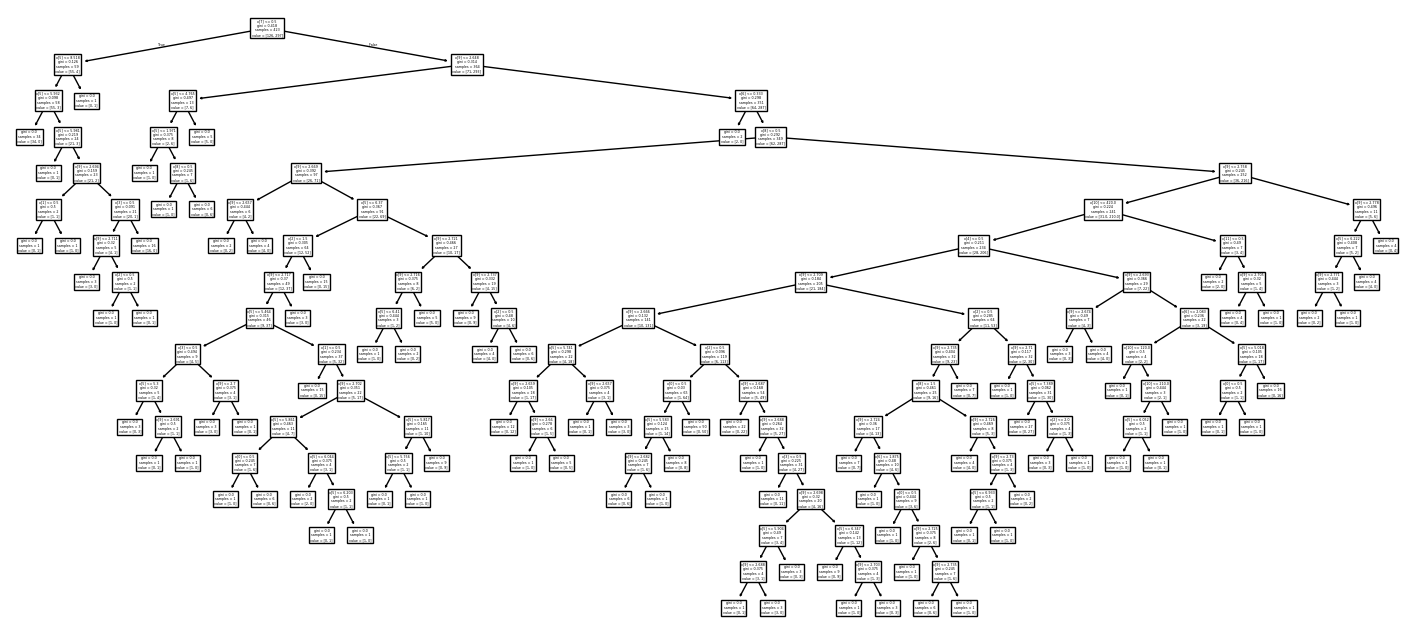

In [97]:
model = DecisionTreeClassifier(random_state=True)
model.fit(X_train,y_train)

from sklearn.tree import plot_tree
plot_tree(model)
plt.show()

In [102]:
# Hyperparameter Tuning
estimator= DecisionTreeClassifier(random_state=True)
param_grid ={"criterion":["gini","entropy"],
             "max_depth":list(range(1,16))}

dt_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

dt = dt_grid.best_estimator_

In [101]:
# Define estimator
estimator = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 16))
}

# Set up GridSearchCV
dt_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)

# Fit grid search
dt_grid.fit(X_train, y_train)

# Get best estimator
dt = dt_grid.best_estimator_

# Optional: view results
print("Best Parameters:", dt_grid.best_params_)
print("Best CV Accuracy:", dt_grid.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 1}
Best CV Accuracy: 0.8227731092436976


In [103]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [107]:
# important features
feats_ab= pd.DataFrame(data=dt.feature_importances_,
                     index=X.columns,
                     columns=['Importance'])
important_features_dt=feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_dt

['Credit_History']

### Creating Decesion tree model with important parameters and important features

In [111]:
# selectingtrain & test data
X_train_dt=X_train[important_features_dt]
X_test_dt = X_test[important_features_dt]

#Modelling
dt.fit(X_train_dt,y_train)

#evaluation
ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("CV Score:", cross_val_score(dt, X_train, y_train, cv=5, scoring="accuracy").mean())
print("Test Accuracy:", accuracy_score(y_test, ypred_test))


Train Accuracy: 0.8226950354609929
CV Score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


### 5.Random Forest Classifier

- HPT
- identify important features
- Modelling
- Evaluation

In [119]:
# Hyper parameter Tuning
estimator = RandomForestClassifier(random_state=True)
param_grid={'n_estimators':list(range(1,51))}
rf_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rf_grid.fit(X_train,y_train)

rf=rf_grid.best_estimator_

In [120]:
rf

RandomForestClassifier(n_estimators=31, random_state=True)

In [118]:
# important features
feats_ab = pd.DataFrame(data=rf.feature_importances_,
              index=X.columns,
              columns=['Importance'])
important_feature_rf = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_feature_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income',
 'Loan_Amount_term',
 'married']

In [123]:
X_train_rf = X_train[important_feature_rf]
X_test_rf = X_test[important_feature_rf]

#modelling
ypred_train =rf.predict(X_train_rf)
ypred_test=rf.predict(X_test_rf)

print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("CV Score:", cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy").mean())
print("Test Accuracy:", accuracy_score(y_test, ypred_test))


Train Accuracy: 0.9976359338061466
CV Score: 0.8204481792717087
Test Accuracy: 0.7830188679245284


### 6.AdaBoost Classifier

In [125]:
estimator = AdaBoostClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))}

ab_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
ab_grid.fit(X_train,y_train)

ab = ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=3, random_state=True)

In [127]:
#importantfeatures
feats_ab = pd.DataFrame(data=ab.feature_importances_,
                       index=X.columns,
                       columns=['Importance'])
important_features_ab=feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_ab

['Credit_History', 'Property_Area', 'Income']

In [3]:
# X_train_ab = X_train[important_features_ab]
# X_test_ab = X_test[important_features_ab]

# #modelling
# ypred_train =ab.predict(X_train_ab)
# ypred_test=ab.predict(X_test_ab)

# print("Train Accuracy:", accuracy_score(y_train, ypred_train))
# ))print("CV Score:", cross_val_score(ab, X_train, y_train, cv=5, scoring="accuracy").mean())
# print("Test Accuracy:", accuracy_score(y_test, ypred_test

In [140]:
ab = AdaBoostClassifier()  # or use the same hyperparameters as before
ab.fit(X_train_ab, y_train)

ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Test Accuracy:", accuracy_score(y_test, ypred_test))
print("CV Score:", cross_val_score(ab, X_train, y_train, cv=5, scoring="accuracy").mean())


Train Accuracy: 0.8699763593380615
Test Accuracy: 0.7735849056603774
CV Score: 0.8110924369747898


### 7.gradient boost clasifier

In [141]:
estimator = GradientBoostingClassifier(random_state=True)
param_grid = {"n_estimators":list(range(1,10)),
              "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1.0]}
gb_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)                                
gb_grid.fit(X_train,y_train)

gb =gb_grid.best_estimator_

In [2]:
# #important features
# feats_gb = pd.DataFrame(data=gb.feature_importances_,
#                          index=X.columns,
#                          columns=['Importance'])
# importance_features_gb = feats_gb[feats_gb['Importances']>0].index.tolist()
# important_features_gb

In [143]:


# Define estimator with a valid random_state
estimator = GradientBoostingClassifier(random_state=42)

# Define parameter grid (fixed typo)
param_grid = {
    "n_estimators": list(range(1, 10)),
    "learning_rate": [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 1.0]
}

# GridSearchCV
gb_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)

# Fit
gb_grid.fit(X_train, y_train)

# Best estimator
gb = gb_grid.best_estimator_



In [144]:
feats_gb = pd.DataFrame(
    data=gb.feature_importances_,
    index=X.columns,
    columns=['Importance']
)

important_features_gb = feats_gb[feats_gb['Importance'] > 0].index.tolist()
important_features_gb


['LoanAmount',
 'Credit_History',
 'Property_Area',
 'Income',
 'Loan_Amount_term',
 'married']

In [1]:


# X_train_gb = X_train[important_features_gb]
# X_test_gb = X_test[important_features_gb]

# # Predictions
# ypred_train = gb.predict(X_train_gb)
# ypred_test = gb.predict(X_test_gb)

# # Evaluation
# print("Train Accuracy:", accuracy_score(y_train, ypred_train))
# print("CV Score:", cross_val_score(gb, X_train_gb, y_train, cv=5, scoring="accuracy").mean())
# print("Test Accuracy:", accuracy_score(y_test, ypred_test))


In [150]:
# Select important features
X_train_gb = X_train[important_features_gb]
X_test_gb = X_test[important_features_gb]

# Retrain Gradient Boosting on these features
from sklearn.ensemble import GradientBoostingClassifier

gb_new = GradientBoostingClassifier(**gb.get_params())  # keep best params
gb_new.fit(X_train_gb, y_train)

# Predictions
ypred_train = gb_new.predict(X_train_gb)
ypred_test = gb_new.predict(X_test_gb)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, ypred_train))

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(gb_new, X_train_gb, y_train, cv=5, scoring='accuracy').mean()
print("CV Score:", cv_score)

print("Test Accuracy:", accuracy_score(y_test, ypred_test))


Train Accuracy: 0.8321513002364066
CV Score: 0.8227450980392158
Test Accuracy: 0.7735849056603774


### XgBoost Classifier

In [151]:
#Hyperparameter tuning

# Estimator
estimator = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Parameter grid
param_grid = {
    "n_estimators": [10, 20, 40, 100],
    "max_depth": [3, 4, 5],
    "gamma": [0, 0.15, 0.3, 0.5, 1]
}

# Grid search
xgb_grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)
xgb_grid.fit(X_train, y_train)

# Best estimator
xgb = xgb_grid.best_estimator_




In [154]:
import pandas as pd

# Get feature importances
feats_xgb = pd.DataFrame(
    data=xgb.feature_importances_,
    index=X_train.columns,
    columns=['Importance']
)

# Select features with importance > 0
important_features_xgb = feats_xgb[feats_xgb['Importance'] > 0].index.tolist()

# Optional: print or view
print(important_features_xgb)


['Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Income']


In [155]:
X_train_xgb = X_train[important_features_xgb]
X_test_xgb = X_test[important_features_xgb]

# Retrain with these features
from sklearn.base import clone
xgb_new = clone(xgb)
xgb_new.fit(X_train_xgb, y_train)

# Predict
ypred_train = xgb_new.predict(X_train_xgb)
ypred_test = xgb_new.predict(X_test_xgb)

# Evaluate
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, ypred_train))

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(xgb_new, X_train_xgb, y_train, cv=5, scoring="accuracy").mean()
print("CV Score:", cv_score)

print("Test Accuracy:", accuracy_score(y_test, ypred_test))


Train Accuracy: 0.8321513002364066
CV Score: 0.82515406162465
Test Accuracy: 0.7830188679245284


# save the best model

In [156]:
from joblib import dump

dump(dt,'loan.joblib')


['loan.joblib']